In [10]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns
import numpy as np
color = sns.color_palette()
%matplotlib inline

In [11]:
nc = 20
ns = 20
c_start = 18.
c_stop = 22.
s_start = 0.
s_stop = 16.
xt = np.arange(c_start, c_stop, step=0.2)
yt = np.arange(s_start, s_stop, step=-0.2)
# T = 45
T = 50
c = np.linspace(c_start, c_stop, nc)
s = np.linspace(s_start,s_stop, ns)
diagram_name = f'../img/dia_C{str(c_start)}.{str(c_stop)}_S{str(s_start)}.{str(s_stop)}_T{str(T)}_.png'
X, Y = np.meshgrid(c, s)
diagram_name
# X, Y

'../img/dia_C18.0.22.0_S0.0.16.0_T50_.png'

<ipython-input-12-5e13fc3dc560>:53: UserWarning: The following kwargs were not used by contour: 'linewidth'
  hl = p_orientation.contour(X, Y, np_orientation_angle(X,Y,T), 20, colors='black', linewidth=.5)
<ipython-input-12-5e13fc3dc560>:63: UserWarning: The following kwargs were not used by contour: 'linewidth'
  hl = p_elevation.contour(X, Y, np_elevation_angle(X,Y,T), 20, colors='black', linewidth=.5)
<ipython-input-12-5e13fc3dc560>:73: UserWarning: The following kwargs were not used by contour: 'linewidth'
  hl = p_true_angular_deformity.contour(X, Y, np_true_angular_deformity(X,Y,T), 20, colors='black', linewidth=.5)


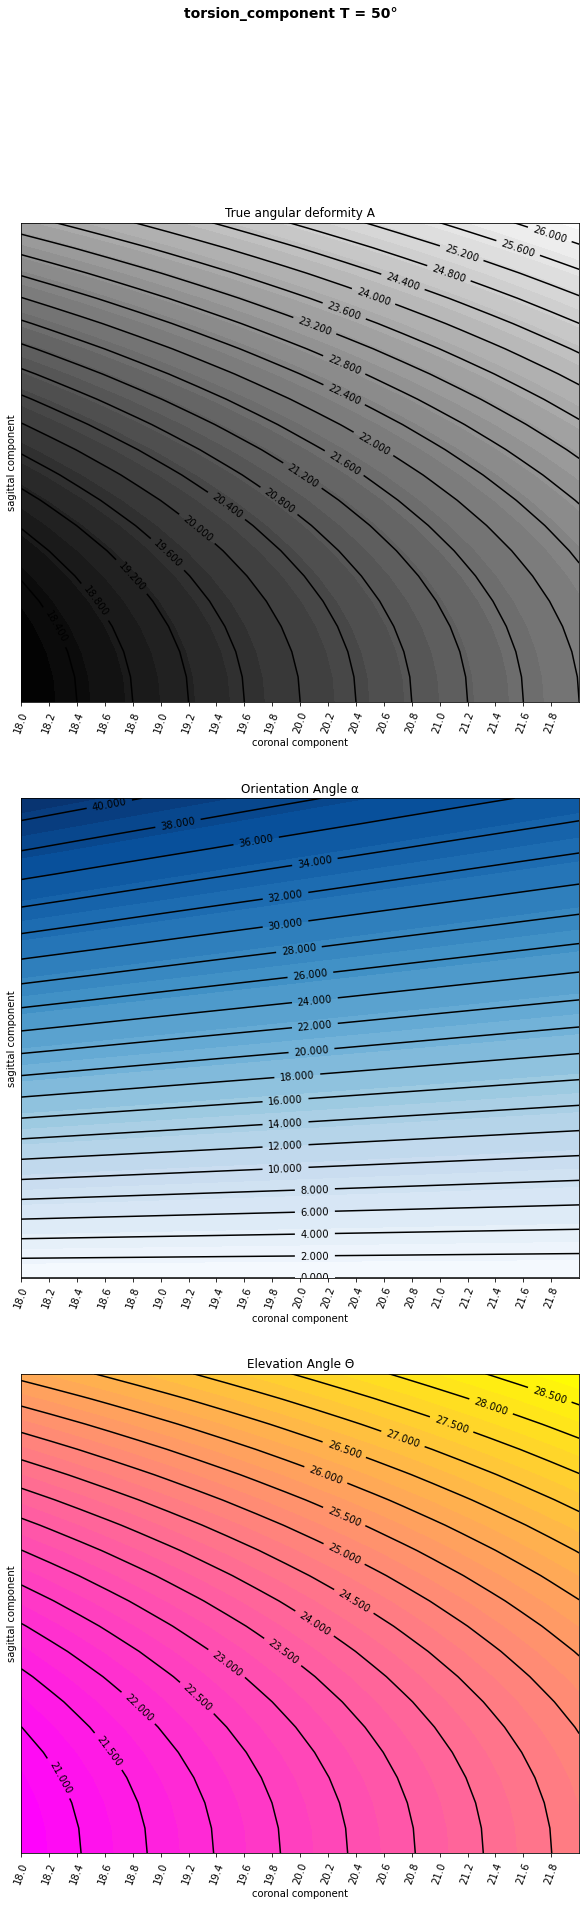

In [12]:
def angles_to_rad(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    t_a = np.radians(_t_a_d)
    return c_a, s_a, t_a

def np_orientation_angle(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    t_a = np.radians(_t_a_d)
    h1 = np.sqrt(np.tan(c_a) * np.tan(c_a) + np.tan(s_a) * np.tan(s_a))
    a_tad = np.arctan2(h1, 1)
    a_oa = np.arctan2(np.tan(s_a), np.tan(c_a))
    a_azi = np.arctan2(-(np.sin(a_oa) + np.sin(a_oa - t_a)), (np.cos(a_oa) + np.cos(a_oa - t_a)))
    a_ele = np.arctan2(2 * np.sin(a_tad) * np.cos(0.5 * t_a), np.sin(t_a) * (1 + np.cos(a_tad)))
    a_aor = np.arccos(0.5 * (np.cos(t_a) + np.cos(a_tad) + np.cos(t_a) * np.cos(a_tad) - 1))
    return np.degrees(a_oa)

def np_elevation_angle(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    t_a = np.radians(_t_a_d)
    h1 = np.sqrt(np.tan(c_a) * np.tan(c_a) + np.tan(s_a) * np.tan(s_a))
    a_tad = np.arctan2(h1, 1)
    a_oa = np.arctan2(np.tan(s_a), np.tan(c_a))
    a_azi = np.arctan2(-(np.sin(a_oa) + np.sin(a_oa - t_a)), (np.cos(a_oa) + np.cos(a_oa - t_a)))
    a_ele = np.arctan2(2 * np.sin(a_tad) * np.cos(0.5 * t_a), np.sin(t_a) * (1 + np.cos(a_tad)))
    a_aor = np.arccos(0.5 * (np.cos(t_a) + np.cos(a_tad) + np.cos(t_a) * np.cos(a_tad) - 1))
    return np.degrees(a_ele)


def np_true_angular_deformity(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    h1 = np.sqrt(np.tan(c_a) * np.tan(c_a) + np.tan(s_a) * np.tan(s_a))
    a_tad = np.arctan2(h1, 1)
    return np.degrees(a_tad)


fig27 = plt.figure(figsize=(10,30))
# fig27.xaxis.set_minor_locator(AutoMinorLocator())
# fig27.tick_params(which='both', width=2)
# fig27.tick_params(which='major', length=7)
# fig27.tick_params(which='minor', length=4, color='r')

fig27.suptitle(f'torsion_component T = {T}°', fontsize=14, fontweight='bold')
p_orientation = fig27.add_subplot(312, xticks=xt, yticks =yt)
plt.xticks(rotation=70)
p_orientation.set_title(f'Orientation Angle {chr(945)}')
p_orientation.set_xlabel('coronal component')
p_orientation.set_ylabel('sagittal component')
img = p_orientation.contourf(X, Y, np_orientation_angle(X,Y,T), 40, cmap='Blues')
hl = p_orientation.contour(X, Y, np_orientation_angle(X,Y,T), 20, colors='black', linewidth=.5)
plt.clabel(hl, inline=1, fontsize=10)


p_elevation = fig27.add_subplot(313, xticks=xt, yticks =yt)
plt.xticks(rotation=70)
p_elevation.set_title(f'Elevation Angle {chr(int("398", 16))}')
p_elevation.set_xlabel('coronal component')
p_elevation.set_ylabel('sagittal component')
img = p_elevation.contourf(X, Y, np_elevation_angle(X,Y,T), 40, cmap='spring')
hl = p_elevation.contour(X, Y, np_elevation_angle(X,Y,T), 20, colors='black', linewidth=.5)
plt.clabel(hl, inline=1, fontsize=10)
# plt.subplots_adjust(hspace=0.2)

p_true_angular_deformity = fig27.add_subplot(311, xticks=xt, yticks =yt)
plt.xticks(rotation=70)
p_true_angular_deformity.set_title(f'True angular deformity A')
p_true_angular_deformity.set_xlabel('coronal component')
p_true_angular_deformity.set_ylabel('sagittal component')
img = p_true_angular_deformity.contourf(X, Y, np_true_angular_deformity(X,Y,T), 40, cmap='gray')
hl = p_true_angular_deformity.contour(X, Y, np_true_angular_deformity(X,Y,T), 20, colors='black', linewidth=.5)
plt.clabel(hl, inline=1, fontsize=10)
# plt.subplots_adjust(hspace=0.2)
fig27.savefig(diagram_name)

In [13]:

# t = np.arange(0.0, 100.0, 0.1)
# s = np.sin(0.1 * np.pi * t) * np.exp(-t * 0.01)
#
# fig, ax = plt.subplots()
# ax.plot(t, s)
#
# # Make a plot with major ticks that are multiples of 20 and minor ticks that
# # are multiples of 5.  Label major ticks with '%d' formatting but don't label
# # minor ticks.
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#
# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(5))
#
# plt.show()
# fig.savefig('../img/test_ticks')


